In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
import os
os.chdir("C:\\Users\\sowmy\\Downloads")

In [88]:
pip install bioinfokit

     ---------------------------------------- 0.0/88.1 kB ? eta -:--:--
     -------- ----------------------------- 20.5/88.1 kB 330.3 kB/s eta 0:00:01
     ----------------- -------------------- 41.0/88.1 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 88.1/88.1 kB 714.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for textwrap3 from https://files.pythonhosted.org/packages/77/9c/a53e

In [193]:
Mcdonalds=pd.read_csv("mcdonalds.csv")

In [194]:
Mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [195]:
Mcdonalds['Like']=Mcdonalds['Like'].apply(lambda x:x.replace('I love it!+5','+5'))

In [196]:
Mcdonalds['Like']=Mcdonalds['Like'].apply(lambda x:x.replace('I hate it!-5','-5'))

In [124]:
Mcdonalds.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [125]:
Mcdonalds.shape

(1453, 15)

In [173]:
Mcdonalds.duplicated().sum()

22

In [175]:
Mcdonalds=Mcdonalds.drop_duplicates()

In [176]:
Mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1431 non-null   object
 1   convenient      1431 non-null   object
 2   spicy           1431 non-null   object
 3   fattening       1431 non-null   object
 4   greasy          1431 non-null   object
 5   fast            1431 non-null   object
 6   cheap           1431 non-null   object
 7   tasty           1431 non-null   object
 8   expensive       1431 non-null   object
 9   healthy         1431 non-null   object
 10  disgusting      1431 non-null   object
 11  Like            1431 non-null   int32 
 12  Age             1431 non-null   int64 
 13  VisitFrequency  1431 non-null   int32 
 14  Gender          1431 non-null   int32 
 15  cluster_num     1431 non-null   int32 
dtypes: int32(4), int64(1), object(11)
memory usage: 167.7+ KB


In [177]:
Mcdonalds.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender',
 'cluster_num']

In [197]:
from sklearn.preprocessing import LabelEncoder


In [199]:
Mcdonalds.iloc[:,0:11]=Mcdonalds.iloc[:,0:11].apply(LabelEncoder().fit_transform)

In [200]:
Mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [203]:
Mcdonalds_Survey=Mcdonalds.iloc[:,0:11].mean()

In [204]:
Mcdonalds_Survey.sort_values(ascending=False)

convenient    0.907777
fast          0.900206
fattening     0.867171
tasty         0.644184
cheap         0.598761
yummy          0.55265
greasy        0.526497
expensive      0.35788
disgusting    0.242946
healthy       0.198899
spicy         0.093599
dtype: object

In [205]:
Mcdonalds1=Mcdonalds.iloc[:,0:11]

In [206]:
Mcdonalds1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [207]:
Mcdonalds1.values

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=object)

In [208]:
Corelation=Mcdonalds1.corr()

In [209]:
Corelation

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


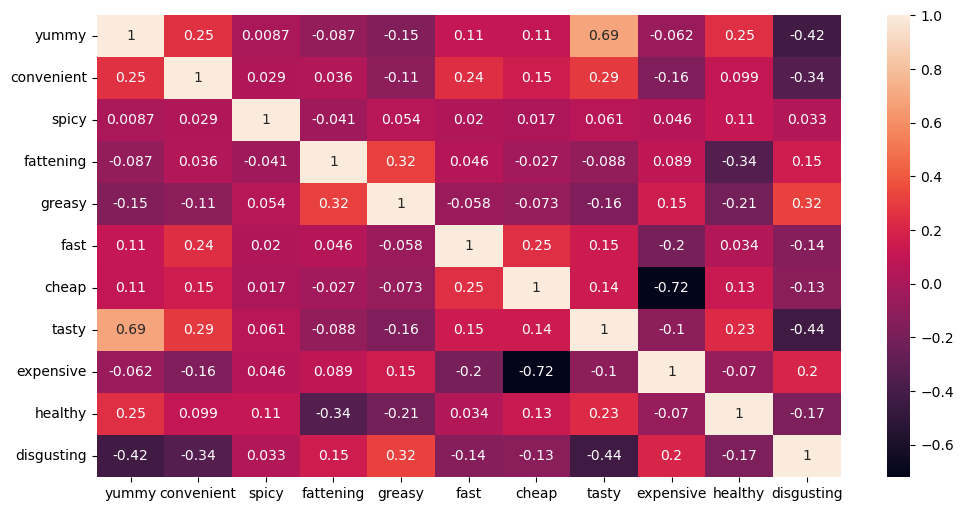

In [138]:
rcParams['figure.figsize']=(12,6)
sns.heatmap(Corelation,annot=True)
plt.show()

In [210]:
x=Mcdonalds1.values

In [211]:
from sklearn.decomposition import PCA

In [212]:
pca=PCA(n_components=11)

In [213]:
pca.fit(x)

PCA(n_components=11)

In [214]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [215]:
pca_x=pca.fit_transform(Mcdonalds1)

In [216]:
pca_x

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [217]:
pca_x1=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [218]:
pca_x1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [219]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [48]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] =Mcdonalds1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\ProgramData\Anaconda\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


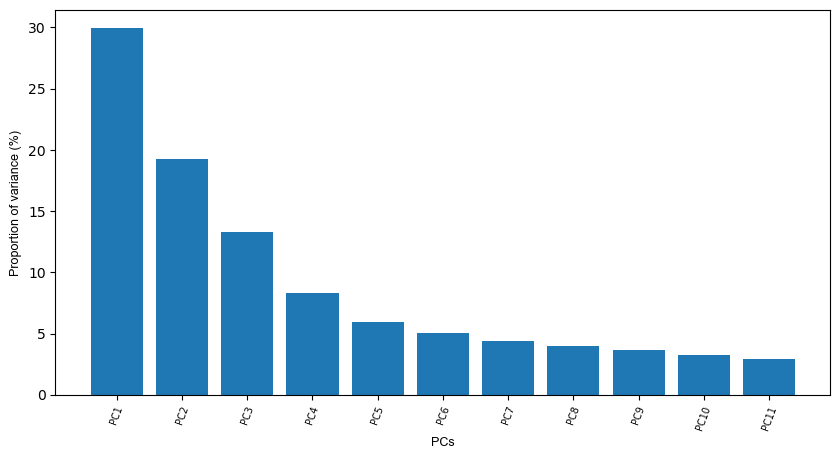

In [220]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

In [221]:
from sklearn.cluster import KMeans

In [222]:
WCSS=[]
for i in range(1,12):
             kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10)
             kmeans.fit(pca_x)
             WCSS.append(kmeans.inertia_)
           

In [225]:
WCSS

[2779.040605643496,
 2145.503726917153,
 1818.714302154245,
 1603.0165988904637,
 1445.0508956915096,
 1348.7080323493199,
 1274.4740915902148,
 1183.7048908657848,
 1129.6750538495255,
 1061.3630641466843,
 1024.8242902962347]

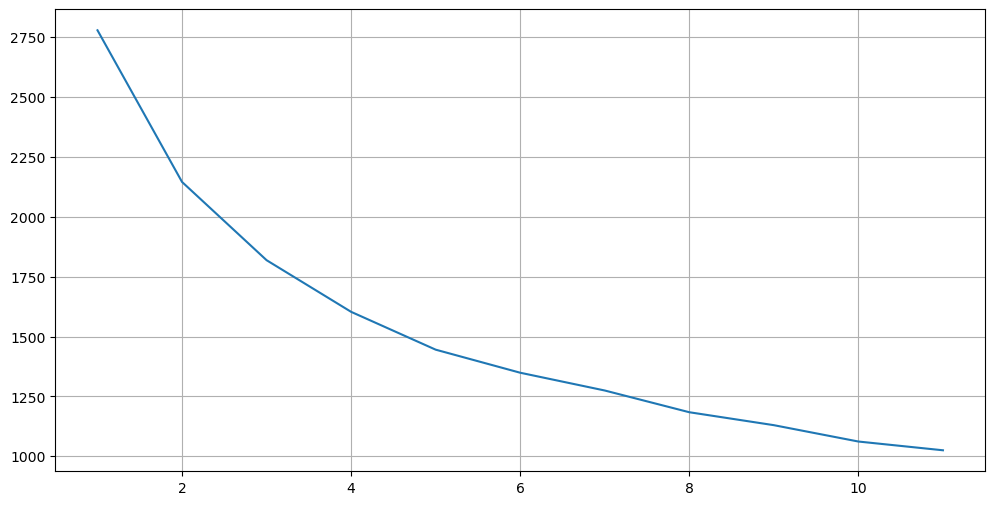

In [229]:
rcParams['figure.figsize']=(12,6)
plt.plot(range(1,12),WCSS)
plt.grid()
plt.show()

In [160]:
kmeans=KMeans(n_clusters=4,init='k-means++',n_init=10)
kmeans.fit(pca_x)
Mcdonalds['cluster_num'] = kmeans.labels_
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[3 2 2 ... 2 0 1]
1603.0604440558923
6
[[-7.24729931e-01 -1.30426601e-01 -3.95539984e-02  9.97926087e-03
  -7.26027669e-02  3.72915989e-02  4.43683057e-03  6.16552079e-03
  -8.51556103e-03 -8.85957981e-03  1.88218362e-02]
 [ 1.18323764e+00  1.96411751e-01  2.20119185e-01  8.59572412e-02
  -6.00681636e-02 -6.78310435e-03 -1.90373799e-02  3.53051247e-03
   1.81267956e-04  2.27527484e-03  5.87196683e-03]
 [ 3.89985378e-02  8.39793952e-01 -1.64514417e-01 -3.93214464e-02
   5.44046000e-02 -3.95322306e-02  1.97813423e-02 -1.57938517e-03
  -1.69269411e-03  1.60462316e-02 -2.63316371e-02]
 [ 3.83784122e-01 -8.02379306e-01  7.21386720e-02 -4.68178469e-02
   1.29321340e-01 -2.36564910e-02 -1.40774337e-02 -1.29419958e-02
   1.78985976e-02 -1.98715169e-03 -1.26843752e-02]]


In [161]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 580, 2: 323, 3: 304, 1: 246})

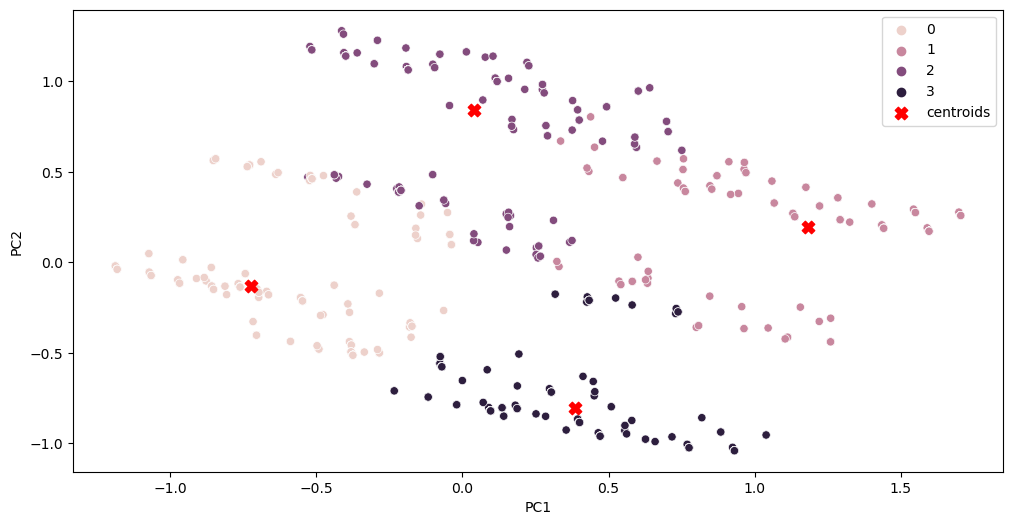

In [162]:
sns.scatterplot(data=pca_x1, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [164]:
crosstab =pd.crosstab(Mcdonalds['cluster_num'],Mcdonalds['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,4,4,2,6,13,43,65,90,143,111,99
1,89,28,30,19,13,39,14,6,8,0,0
2,5,3,7,6,7,36,42,60,66,47,44
3,54,36,34,28,25,51,31,31,12,2,0


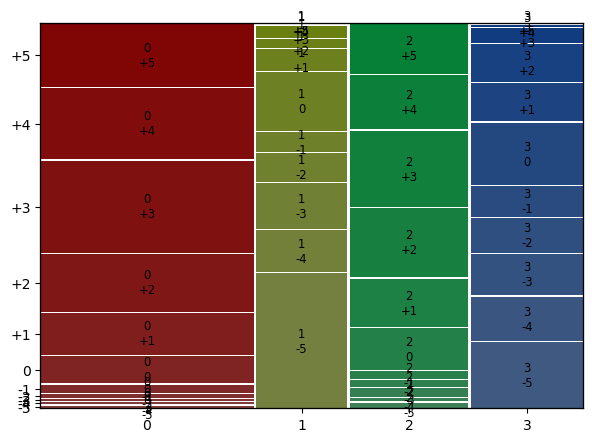

In [165]:
#MOSAIC PLOT

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [166]:
crosstab_gender =pd.crosstab(Mcdonalds['cluster_num'],Mcdonalds['Gender'])
crosstab_gender


Gender,Female,Male
cluster_num,,
0,349,231
1,106,140
2,154,169
3,179,125


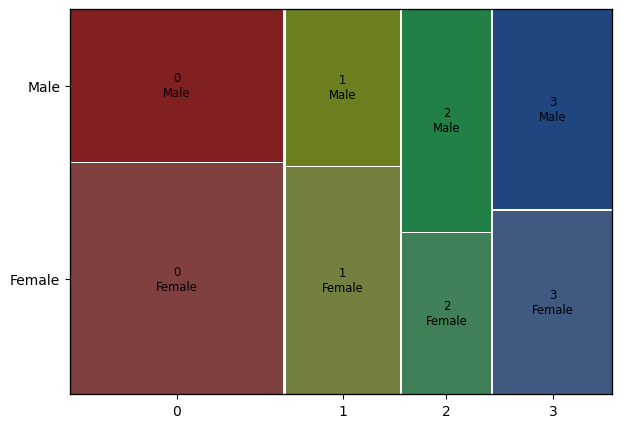

In [95]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

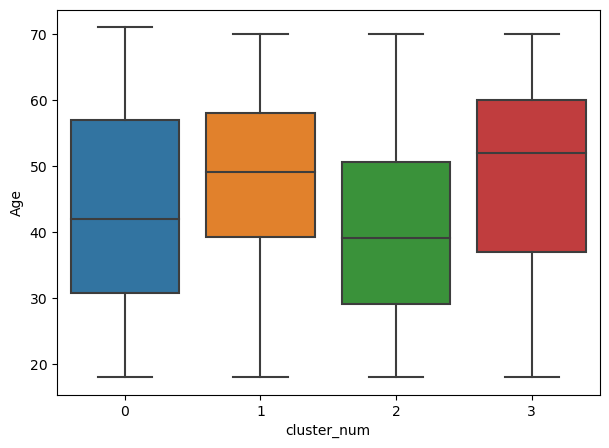

In [167]:

sns.boxplot(x="cluster_num", y="Age", data=Mcdonalds)

In [168]:
Mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(Mcdonalds['VisitFrequency'])
visit = Mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.584483
1,1,2.654472
2,2,2.547988
3,3,2.822368


In [169]:
Mcdonalds['Like'] = LabelEncoder().fit_transform(Mcdonalds[['Like']])
Like = Mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

C:\ProgramData\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,cluster_num,Like
0,0,2.962069
1,1,7.422764
2,2,3.275542
3,3,6.171053


In [170]:
Mcdonalds['Gender'] = LabelEncoder().fit_transform(Mcdonalds['Gender'])
Gender = Mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.398276
1,1,0.569106
2,2,0.523220
3,3,0.411184


In [171]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.398276,2.962069,2.584483
1,1,0.569106,7.422764,2.654472
2,2,0.523220,3.275542,2.547988
3,3,0.411184,6.171053,2.822368


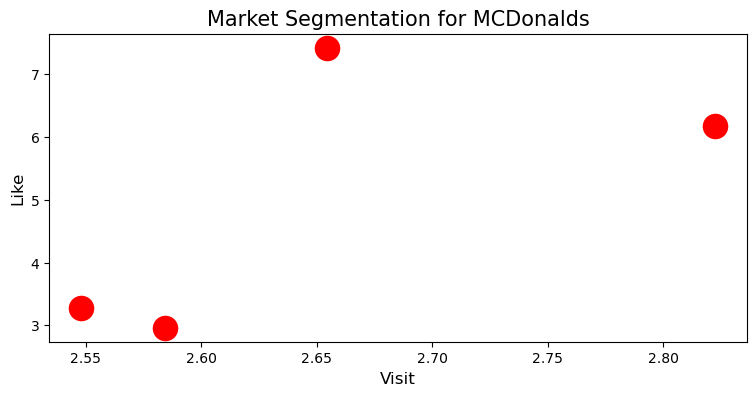

In [227]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Market Segmentation for MCDonalds",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()